In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install overpy
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 473.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for overpy: filename=overpy-0.6-py3-none-any.whl size=14091 sha256=6cc83f6f36818fad520b92e3564a3edc11c0d08b3ea432e1b1af467f478aa53c
  Stored in directory: /root/.cache/pip/wheels/6f/05/ef/529f51b5983091d5b53077e4f2f81d052a939573c5dd07acfc
Successfully built overpy


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## ДТП

In [4]:
df_dtp = pd.read_csv("/content/drive/MyDrive/Perm_data/ДТП.csv")
df_dtp.sample(5)

,Район,Тип выезда,Дата и время пожара,Причина
28039,Соликамский ГО,ДТП,2021-08-14 10:23:00,ДТП/Столкновение
25240,Добрянский ГО,ДТП,2020-03-08 10:53:00,ДТП/Столкновение
12685,Большесосновский МО,ДТП,2016-05-19 09:29:00,ДТП/Столкновение
20786,Чернушинский ГО,ДТП,2019-09-20 07:30:00,ДТП/Опрокидывание
9101,Кунгурский МО,ДТП,2015-03-28 07:57:00,NaN


In [5]:
df_dtp.drop(index=[22193], inplace=True)

In [6]:
df_dtp.columns

Index(['Район', 'Тип выезда', 'Дата и время  пожара ', 'Причина'], dtype='object')

In [7]:
df_dtp['Дата и время  пожара '] = pd.to_datetime(df_dtp['Дата и время  пожара '])

# Extract the month and year from the 'Дата и время пожара' column
df_dtp['Year'] = df_dtp['Дата и время  пожара '].dt.year
df_dtp['Month'] = df_dtp['Дата и время  пожара '].dt.month

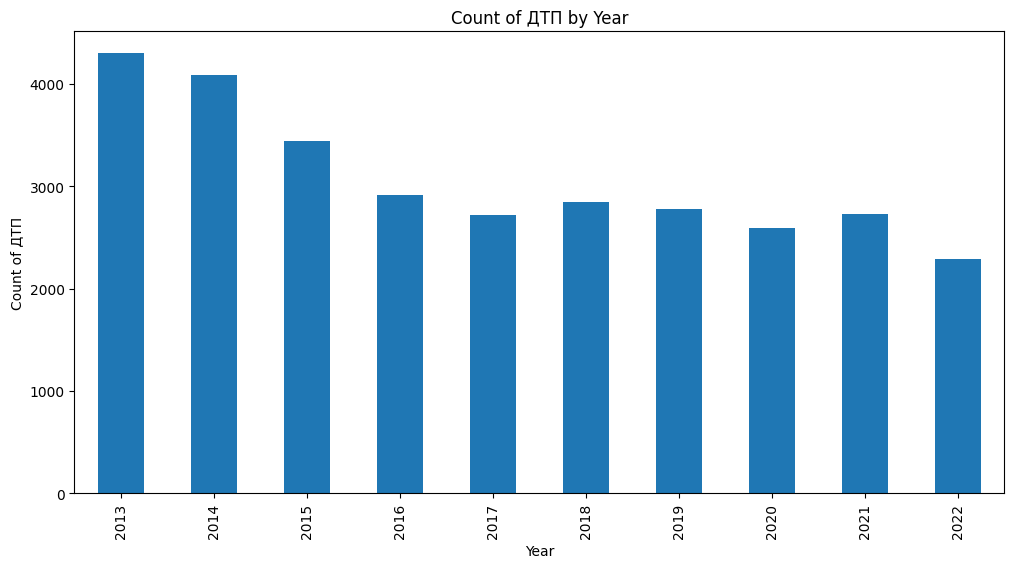

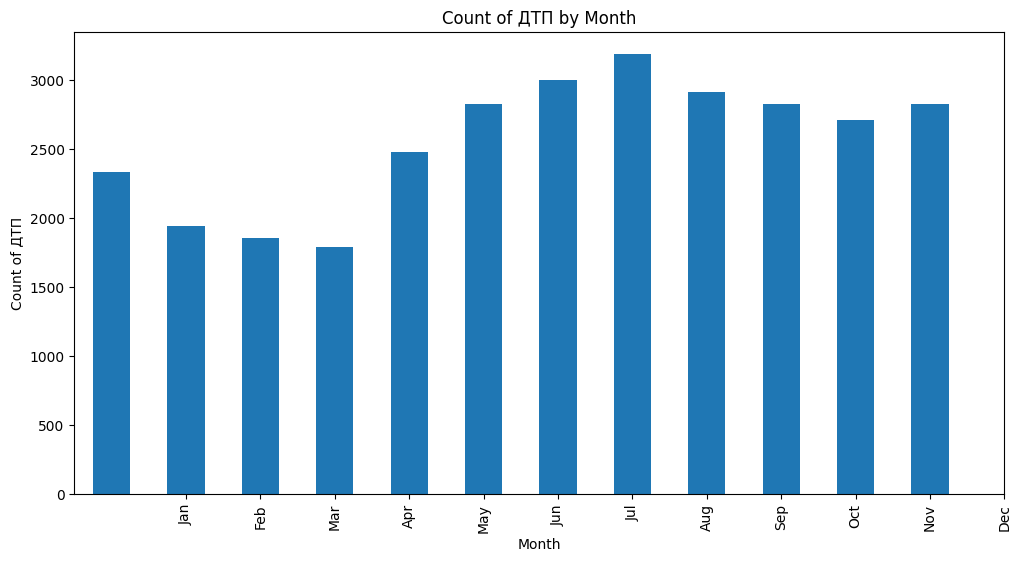

In [8]:
plt.figure(figsize=(12, 6))
df_dtp['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count of ДТП')
plt.title('Count of ДТП by Year')
plt.show()

# Create a histogram for counts of ДТП by month
plt.figure(figsize=(12, 6))
df_dtp['Month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count of ДТП')
plt.title('Count of ДТП by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [9]:
df_dtp['Тип выезда'].value_counts().head(20)

ДТП     30698
Name: Тип выезда, dtype: int64

In [10]:
df_dtp['Причина'].value_counts().head(20)

ДТП/Столкновение                                                14369
ДТП/Наезд на пешехода                                            7301
ДТП/Опрокидывание                                                1215
ДТП/Съезд в кювет                                                1186
ДТП/Наезд на препятствие                                         1067
ДТП/Падение пассажира                                             483
ДТП/Столкновение 2-х ТС                                           366
Неисправность систем, механизмов и узлов транспортного ср-ва      256
ДТП/Столкновение 2 ТС                                             189
ДТП/Столкновение 2-ТС                                             174
ДТП/Столкновение 2-х а/м                                          137
ДТП/Столкновение опрокидывание                                    126
ДТП/Столкновение наезд на препятствие                             104
ДТП/Столкновение 2х ТС                                             67
ДТП/Столкновение съе

## Метеостанции

In [4]:
df_weather = pd.read_csv("/content/drive/MyDrive/Perm_data/Данные по метеостанциям.csv")
df_weather.head(2)

<ipython-input-4-f6e6c4795749>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv("/content/drive/MyDrive/Perm_data/Данные по метеостанциям.csv")


,Местное время,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,meteostation
0,31.12.2022 23:00,-18.6,761.0,770.9,NaN,73.0,"Ветер, дующий с востока",1.0,NaN,NaN,...,NaN,NaN,-22.2,NaN,NaN,NaN,NaN,NaN,NaN,Оса
1,31.12.2022 20:00,-18.0,761.5,771.4,NaN,72.0,"Ветер, дующий с востока",1.0,NaN,NaN,...,NaN,4,-21.8,Следы осадков,12.0,NaN,NaN,NaN,NaN,Оса


In [5]:
df_weather['Местное время'] = pd.to_datetime(df_weather['Местное время'], format='%d.%m.%Y %H:%M')

In [6]:
df_weather.sample(2).T

,112658,279827
Местное время,2020-09-21 20:00:00,2016-11-28 05:00:00
T,2.9,-2.0
Po,730.0,737.9
P,752.3,751.8
Pa,NaN,0.8
U,91.0,94.0
DD,"Ветер, дующий с юго-запада","Ветер, дующий с юго-юго-запада"
Ff,2.0,3.0
ff10,NaN,NaN
ff3,NaN,NaN


In [7]:
df_weather['meteostation'] = df_weather['meteostation'].str.replace(" ", "")
df_weather['meteostation'] = df_weather['meteostation'].str.replace("БольшаяСоснова", "Большая Соснова")

df_weather['time'] = df_weather['Местное время'].dt.time
df_weather['date'] = df_weather['Местное время'].dt.date

In [8]:
df_weather['meteostation'].value_counts()

Чердынь            29194
Гайны             29194
Оханск             29193
Ножовка            29193
Пермь              29192
Кудымкар           29191
Бисер              29189
Чернушка           29137
Верещагино         29066
Лысьва             25140
Октябрьский       25090
Чайковский       25081
Коса               25001
Губаха             25000
Березники          25000
Кочево             24998
Добрянка           24892
Оса                24884
Усть-Черная        18460
Кунгур             18053
Чермоз             18041
Кын                12717
Большая Соснова     9134
Вая                 5476
Name: meteostation, dtype: int64

In [47]:
df_weather[df_weather['meteostation'] == 'Пермь']['time'].value_counts()

20:00:00    3652
11:00:00    3651
08:00:00    3651
14:00:00    3650
17:00:00    3649
05:00:00    3649
23:00:00    3648
02:00:00    3642
Name: time, dtype: int64

In [48]:
df_weather[df_weather['meteostation'] == 'Кунгур']['time'].value_counts()

08:00:00    3081
02:00:00    2261
20:00:00    2248
14:00:00    2240
11:00:00    2119
23:00:00    2057
05:00:00    2051
17:00:00    1996
Name: time, dtype: int64

In [16]:
df_weather.groupby('meteostation')['Местное время'].min()

meteostation
Березники         2013-01-01 02:00:00
Бисер             2013-01-01 02:00:00
Большая Соснова   2019-01-01 05:00:00
Вая               2013-01-25 05:00:00
Верещагино        2013-01-01 02:00:00
Гайны            2013-01-01 02:00:00
Губаха            2013-01-01 02:00:00
Добрянка          2013-01-01 02:00:00
Коса              2013-01-01 02:00:00
Кочево            2013-01-01 02:00:00
Кудымкар          2013-01-01 02:00:00
Кунгур            2013-01-01 08:00:00
Кын               2014-01-23 12:00:00
Лысьва            2013-01-01 02:00:00
Ножовка           2013-01-01 02:00:00
Октябрьский      2013-01-01 02:00:00
Оса               2013-01-01 02:00:00
Оханск            2013-01-01 02:00:00
Пермь             2013-01-01 02:00:00
Усть-Черная       2016-08-01 05:00:00
Чайковский      2013-01-01 02:00:00
Чердынь           2013-01-01 02:00:00
Чермоз            2013-01-01 08:00:00
Чернушка          2013-01-01 02:00:00
Name: Местное время, dtype: datetime64[ns]

In [51]:
df_weather_morning = df_weather[df_weather["Местное время"].dt.hour==8]
df_weather_aftrenoon = df_weather[df_weather["Местное время"].dt.hour==20]

In [54]:
unique_dates = list(df_weather_morning["Местное время"].unique())
unique_cities = list(df_weather_morning["meteostation"].unique())

In [92]:
date_city_combinations = pd.MultiIndex.from_product([unique_dates], names=['Местное время'])
new_df = pd.DataFrame(index=date_city_combinations).reset_index()

In [20]:
df_weather = df_weather.loc[df_weather["meteostation"] == "Пермь"]

In [21]:
df_weather_morning = df_weather[df_weather["Местное время"].dt.hour==8]

In [22]:
len(df_weather_morning)

3651

In [23]:
df_weather.columns

Index(['Местное время', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3',
       'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV',
       'Td', 'RRR', 'tR', 'E', 'Tg', 'E_second', 'sss', 'meteostation', 'time',
       'date'],
      dtype='object')

In [26]:
# df_weather_morning.sort_values(by='Местное время', inplace=True)
# merged_df = pd.merge_asof(df_weather_morning, df_weather_morning, on='Местное время', suffixes=('', '_morning_one_year_ago'), direction='backward', tolerance=pd.Timedelta(days=365))

# Скрипт начало

In [25]:
import warnings

# Suppress SettingWithCopyWarning and PerformanceWarning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [64]:
df_weather = pd.read_csv("/content/drive/MyDrive/Perm_data/Данные по метеостанциям.csv")

df_weather['Местное время'] = pd.to_datetime(df_weather['Местное время'], format='%d.%m.%Y %H:%M')

df_weather['meteostation'] = df_weather['meteostation'].str.replace(" ", "")
df_weather['meteostation'] = df_weather['meteostation'].str.replace("БольшаяСоснова", "Большая Соснова")

df_weather = df_weather.loc[df_weather["meteostation"] == "Пермь"] # Только пермь
df_weather.rename(columns={"E'": 'E_second'}, inplace=True)

columns = ['T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3',
       'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV',
       'Td', 'RRR', 'tR', 'E', 'Tg', 'E_second']

df_weather_morning = df_weather[df_weather["Местное время"].dt.hour==8] # Восемь часов утра
df_weather_aftrenoon = df_weather[df_weather["Местное время"].dt.hour==20]

df_weather_morning.sort_values(by='Местное время', inplace=True)
df_weather_aftrenoon.sort_values(by='Местное время', inplace=True)

<ipython-input-64-35b985605940>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv("/content/drive/MyDrive/Perm_data/Данные по метеостанциям.csv")


In [65]:
for i in range(1, 11):
  for column in columns:
      df_weather_morning.loc[:, f'{column}_morning_plus_{i}_day'] = df_weather_morning[column].shift(-i)
      df_weather_aftrenoon.loc[:, f'{column}_afternoon_plus_{i}_day'] = df_weather_aftrenoon[column].shift(-i)

for i in range(1, 6):
  for column in columns:
      df_weather_morning.loc[:, f'{column}_morning_minus_{i}_day'] = df_weather_morning[column].shift(i)
      df_weather_aftrenoon.loc[:, f'{column}_afternoon_minus_{i}_day'] = df_weather_aftrenoon[column].shift(-i)

for i in range(1, 3):
  for column in columns:
      df_weather_morning.loc[:, f'{column}_morning_minus_{i}_year'] = df_weather_morning[column].shift(i*365)
      df_weather_aftrenoon.loc[:, f'{column}_afternoon_minus_{i}_year'] = df_weather_aftrenoon[column].shift(i*365)

# Скрипт конец

In [ ]:
df_weather = pd.read_csv("/content/drive/MyDrive/Perm_data/Данные по метеостанциям.csv")
df_weather['Местное время'] = pd.to_datetime(df_weather['Местное время'], format='%d.%m.%Y %H:%M')
df_weather = df_weather[df_weather["Местное время"].dt.hour==8]

df_weather['meteostation'] = df_weather['meteostation'].str.replace(" ", "")
df_weather['meteostation'] = df_weather['meteostation'].str.replace("БольшаяСоснова", "Большая Соснова")

<ipython-input-201-02ffd69ca50c>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv("/content/drive/MyDrive/Perm_data/Данные по метеостанциям.csv")


In [ ]:
df_weather = df_weather[['Местное время', 'T', 'meteostation']]

In [ ]:
df_weather.to_csv("weather_data.csv")

In [ ]:
pd.read_csv("weather_data.csv", index_col="Unnamed: 0")

,Местное время,T,meteostation
5,2022-12-31 08:00:00,-16.3,Оса
13,2022-12-30 08:00:00,-11.4,Оса
21,2022-12-29 08:00:00,-23.8,Оса
29,2022-12-28 08:00:00,-10.4,Оса
36,2022-12-27 08:00:00,-12.4,Оса
...,...,...,...
569469,2013-01-07 08:00:00,-5.3,Добрянка
569483,2013-01-05 08:00:00,-7.6,Добрянка
569490,2013-01-04 08:00:00,-12.1,Добрянка
569505,2013-01-02 08:00:00,-28.0,Добрянка


In [ ]:
mapping = pd.read_csv("/content/drive/MyDrive/Perm_data/Данные по метеостанциям. Соответствие МО.csv")

In [ ]:
mapping.head(5)

,Муниципальное образование,Метеорологическая станция
0,Александровский МО,г. Березники
1,Бардымский МО,г. Оса
2,Березовский МО,г. Кунгур
3,Большесосновский МО,с. Большая Соснова
4,Верещагинский ГО,г. Верещагино


In [ ]:
mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace("г.", "")
mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace("п.", "")
mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace("с.", "")

<ipython-input-232-9ffaa2132db7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace("г.", "")
<ipython-input-232-9ffaa2132db7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace("п.", "")
<ipython-input-232-9ffaa2132db7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace("с.", "")


In [ ]:
mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace(" ", "")
mapping['Метеорологическая станция'] = mapping['Метеорологическая станция'].str.replace("БольшаяСоснова", "Большая Соснова")

In [ ]:
mapping

,Муниципальное образование,Метеорологическая станция
0,Александровский МО,Березники
1,Бардымский МО,О
2,Березовский МО,Кунр
3,Большесосновский МО,БольшаяСоова
4,Верещагинский ГО,Верещано
5,Гайнский МО,Гайны
6,ГО город Березники,Березники
7,ГО город Кизел,Губаха
8,Горнозаводский ГО,Бир
9,Губахинский МО,Губаха


In [ ]:
mapping.loc[mapping["Муниципальное образование"]== "Оханский ГО"]['Метеорологическая станция'].values[0]

'Охан'

# ОЯ и НЯ

In [28]:
new_df = pd.read_csv("/content/drive/MyDrive/Perm_data/all_dates.csv", index_col="Unnamed: 0")

In [29]:
df_oya = pd.read_csv("/content/drive/MyDrive/Perm_data/ОЯ и НЯ 2.csv", sep=";")
df_oya['Дата, время начала'] = pd.to_datetime(df_oya['Дата, время начала'], format='%Y-%m-%d %H:%M')
df_oya

df_oya = df_oya.drop(columns=["Районы", "подтвержденные (прогноз оправдался)", "Характеристика", "Последствия"])
new_df = new_df.rename(columns={"Местное время": "Дата, время начала"})

In [30]:
new_df = new_df.rename(columns={"Местное время": "Дата, время начала"})

In [31]:
df_oya['Дата, время начала'] = pd.to_datetime(df_oya['Дата, время начала'], format='%Y-%m-%d %H:%M'

SyntaxError: ignored

In [ ]:
new_df['Дата, время начала'] = pd.to_datetime(new_df['Дата, время начала'], format='%Y-%m-%d %H:%M')

In [32]:
merged_df = pd.merge(new_df, df_oya, on=['Дата, время начала'], how='outer')

ValueError: ignored

In [33]:
merged_df

,"Дата, время начала","НЯ, ОЯ, КНЯ",Тип явления,Критерий,чрезвычайная пожарная опасность,заморозки,сильный ветер,сильный дождь,сильное гололедно-изморозевое отложение на проводах,аномально жаркая погода,...,сильный снег,половодье,паводок,шквал,аномально холодная погода,сильный мороз,град,ливень,сильный ливень,туман
0,2022-12-31 08:00:00,NaN,NaN,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2022-12-30 08:00:00,NaN,NaN,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022-12-29 08:00:00,NaN,NaN,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2022-12-28 08:00:00,NaN,NaN,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022-12-27 08:00:00,NaN,NaN,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,2022-09-27 00:00:00,ОЯ,Агрометеорологическое,Заморозки,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4189,2022-11-03 00:00:00,НЯ,Метеорологическое,"Гололед, налипание мокрого снега при сильном ...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4190,2022-12-05 00:00:00,ОЯ,Метеорологическое,"Гололед, налипание мокрого снега при сильном ...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4191,2022-12-11 20:00:00,НЯ,КНЯ,"Гололед, налипание мокрого снега при сильном ...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
unique_conditions = [
    'чрезвычайная пожарная опасность',
    'заморозки',
    'сильный ветер',
    'сильный дождь',
    'сильное гололедно-изморозевое отложение на проводах',
    'аномально жаркая погода',
    'налипание мокрого снега при сильном ветре',
    'гололед',
    'сильный мокрый снег',
    'сильный снег',
    'половодье',
    'паводок',
    'шквал',
    'аномально холодная погода',
    'сильный мороз',
    'град',
    'ливень',
    'сильный ливень',
    'туман',
]

In [35]:
dummy_df = pd.DataFrame(0, columns=unique_conditions, index=merged_df.index)

# Iterate through the DataFrame and calculate dummy variables for each row
for index, row in merged_df.iterrows():
    current_date = row['Дата, время начала']
    past_date = current_date - pd.DateOffset(days=7)
    future_date = current_date + pd.DateOffset(days=3)
    mask = (merged_df['Дата, время начала'] >= past_date) & (merged_df['Дата, время начала'] <= current_date) & (merged_df["Критерий"].notna())
    part = merged_df[mask]
    if not part.empty:
        for index_2, row_2 in part.iterrows():
            for condition in unique_conditions:
                if condition in row_2["Критерий"].lower():
                  dummy_df.at[index, condition] += 1

In [36]:
merged_df = pd.concat([merged_df, dummy_df], axis=1)

In [37]:
unique_dates_df = merged_df.drop_duplicates(subset=['Дата, время начала'], keep='last')

In [38]:
unique_dates_df = unique_dates_df.drop_duplicates(subset=['Дата, время начала'])

In [39]:
unique_dates_df = unique_dates_df.sort_values(by='Дата, время начала')

In [225]:
unique_dates_df.to_excel("test_data_weather.xlsx")

In [40]:
unique_dates_df['Дата, время начала'] = unique_dates_df['Дата, время начала'].dt.date

In [41]:
unique_dates_df.to_csv("ОЯ И НЯ для сайта.csv")